# Predicting Restaurant Food Cost 


#### Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Data_Train_Restaurant.xlsx')
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


### Exploratory Data Analysis

In [3]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
data.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


#### Lets check the null values without using visualization

In [5]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

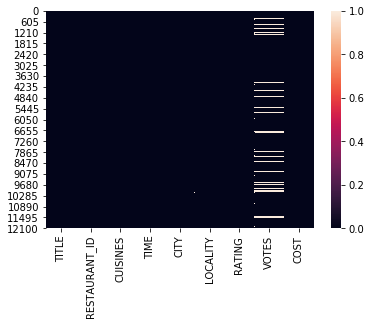

In [6]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

#### Filling Null Values with Mode

In [7]:
for column in ['CITY','LOCALITY','RATING','VOTES']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [8]:
data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

#### Let's Check uniqueness of all columns and take appropriate action 

In [9]:
data['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [10]:
data['RESTAURANT_ID'].unique()

array([ 9438, 13198, 10915, ..., 13228,  9686,  6134], dtype=int64)

#### Here all values of RESTAURANT_ID's are unique so I am deleting this column

In [11]:
data.drop('RESTAURANT_ID',axis=1,inplace=True)

In [12]:
data

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [13]:
data['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [14]:
data['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12:1pm – 4am (Mon-Sun)', '12:30pm – 9:45pm (Mon-Sun)',
       '12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...'], dtype=object)

#### Here Time has many unique values and it will not depend upon Price so I am deleting this column

In [15]:
data.drop('TIME',axis=1,inplace=True)

In [16]:
data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",Chennai,Maduravoyal,3.5,32 votes,400


In [17]:
data['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powa

In [18]:
data['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ..., 'Market Road',
       'Near Perambur', 'Near Malviya Nagar'], dtype=object)

In [19]:
data['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [20]:
data.dtypes

TITLE       object
CUISINES    object
CITY        object
LOCALITY    object
RATING      object
VOTES       object
COST         int64
dtype: object

#### Lets Convert TITLE Column into Numeric 

In [21]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [22]:
array = data['TITLE']

array.shapearray = data['TITLE']

array.shape

(12690,)

In [23]:
le=LabelEncoder()
data1=le.fit_transform(data['TITLE'])
data1

array([31, 33, 31, ..., 71, 31, 31])

In [24]:
data['TITLE']=data1

In [25]:
data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200
1,33,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500
2,31,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800
3,95,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24 votes,800
4,50,Desserts,Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...
12685,95,"North Indian, Burger, Kebab",Hyderabad,Gachibowli,3.8,546 votes,500
12686,33,"Goan, Continental",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,71,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,Vashi,4.0,608 votes,1300
12688,31,"North Indian, South Indian, Chinese, Street Food",Chennai,Maduravoyal,3.5,32 votes,400


#### Lets Convert CUISINES Column into Numeric 

In [26]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [27]:
array = data['CUISINES']

array.shapearray = data['CUISINES']

array.shape

(12690,)

In [28]:
le=LabelEncoder()
data1=le.fit_transform(data['CUISINES'])
data1

array([2627,  289, 2976, ..., 2088, 3506, 2946])

In [29]:
data['CUISINES']=data1

In [30]:
data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,Thane,Dombivali East,3.6,49 votes,1200
1,33,289,Chennai,Ramapuram,4.2,30 votes,1500
2,31,2976,Chennai,Saligramam,3.8,221 votes,800
3,95,4130,Mumbai,Bandra West,4.1,24 votes,800
4,50,1766,Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...
12685,95,2934,Hyderabad,Gachibowli,3.8,546 votes,500
12686,33,2143,Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,71,2088,Navi Mumbai,Vashi,4.0,608 votes,1300
12688,31,3506,Chennai,Maduravoyal,3.5,32 votes,400


#### Lets Convert CITY column into Numeric

In [31]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [32]:
array = data['CITY']

array.shapearray = data['CITY']

array.shape

(12690,)

In [33]:
le=LabelEncoder()
data1=le.fit_transform(data['CITY'])
data1

array([320,  67,  67, ..., 239,  67, 131])

In [34]:
data['CITY']=data1

In [35]:
data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,320,Dombivali East,3.6,49 votes,1200
1,33,289,67,Ramapuram,4.2,30 votes,1500
2,31,2976,67,Saligramam,3.8,221 votes,800
3,95,4130,222,Bandra West,4.1,24 votes,800
4,50,1766,222,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...
12685,95,2934,131,Gachibowli,3.8,546 votes,500
12686,33,2143,222,Bandra Kurla Complex,4.3,1214 votes,1800
12687,71,2088,239,Vashi,4.0,608 votes,1300
12688,31,3506,67,Maduravoyal,3.5,32 votes,400


#### Lets Convert LOCALITY column into Numeric

In [36]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [37]:
array = data['LOCALITY']

array.shapearray = data['LOCALITY']

array.shape

(12690,)

In [38]:
le=LabelEncoder()
data1=le.fit_transform(data['LOCALITY'])
data1

array([ 285, 1046, 1101, ..., 1342,  631, 1333])

In [39]:
data['LOCALITY']=data1

In [40]:
data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,320,285,3.6,49 votes,1200
1,33,289,67,1046,4.2,30 votes,1500
2,31,2976,67,1101,3.8,221 votes,800
3,95,4130,222,136,4.1,24 votes,800
4,50,1766,222,620,3.8,165 votes,300
...,...,...,...,...,...,...,...
12685,95,2934,131,342,3.8,546 votes,500
12686,33,2143,222,133,4.3,1214 votes,1800
12687,71,2088,239,1342,4.0,608 votes,1300
12688,31,3506,67,631,3.5,32 votes,400


#### Lets Convert VOTES column into Numeric

In [41]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [42]:
array = data['VOTES']

array.shapearray = data['VOTES']

array.shape

(12690,)

In [43]:
le=LabelEncoder()
data1=le.fit_transform(data['VOTES'])
data1

array([1278,  950,  712, ..., 1428,  996, 1505])

In [44]:
data['VOTES']=data1

In [45]:
data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,320,285,3.6,1278,1200
1,33,289,67,1046,4.2,950,1500
2,31,2976,67,1101,3.8,712,800
3,95,4130,222,136,4.1,787,800
4,50,1766,222,620,3.8,470,300
...,...,...,...,...,...,...,...
12685,95,2934,131,342,3.8,1349,500
12686,33,2143,222,133,4.3,191,1800
12687,71,2088,239,1342,4.0,1428,1300
12688,31,3506,67,631,3.5,996,400


In [46]:
data.dtypes

TITLE        int32
CUISINES     int32
CITY         int32
LOCALITY     int32
RATING      object
VOTES        int32
COST         int64
dtype: object

In [47]:
data['RATING'].mode()

0    3.9
dtype: object

In [48]:
data['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [49]:
data['RATING']

0        3.6
1        4.2
2        3.8
3        4.1
4        3.8
        ... 
12685    3.8
12686    4.3
12687    4.0
12688    3.5
12689    3.4
Name: RATING, Length: 12690, dtype: object

In [50]:
data.replace({'NEW': 3.9, '-': 3.9},inplace=True)

In [51]:
data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,320,285,3.6,1278,1200
1,33,289,67,1046,4.2,950,1500
2,31,2976,67,1101,3.8,712,800
3,95,4130,222,136,4.1,787,800
4,50,1766,222,620,3.8,470,300
...,...,...,...,...,...,...,...
12685,95,2934,131,342,3.8,1349,500
12686,33,2143,222,133,4.3,191,1800
12687,71,2088,239,1342,4.0,1428,1300
12688,31,3506,67,631,3.5,996,400


In [52]:
data['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', 3.9,
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [53]:
data.dtypes

TITLE        int32
CUISINES     int32
CITY         int32
LOCALITY     int32
RATING      object
VOTES        int32
COST         int64
dtype: object

#### Lets Convert RATING column into Numeric

In [54]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [55]:
data2 = pd.get_dummies(data['RATING'])

In [56]:
data['RATING'] = data2

In [57]:
data.dtypes

TITLE       int32
CUISINES    int32
CITY        int32
LOCALITY    int32
RATING      uint8
VOTES       int32
COST        int64
dtype: object

In [58]:
data = pd.DataFrame(data=data)
data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,320,285,0,1278,1200
1,33,289,67,1046,0,950,1500
2,31,2976,67,1101,0,712,800
3,95,4130,222,136,0,787,800
4,50,1766,222,620,0,470,300
...,...,...,...,...,...,...,...
12685,95,2934,131,342,0,1349,500
12686,33,2143,222,133,0,191,1800
12687,71,2088,239,1342,0,1428,1300
12688,31,3506,67,631,0,996,400


In [59]:
data.shape

(12690, 7)

In [60]:
data.describe()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.00000,12690.000000,12690.000000
mean,59.465721,2235.193932,142.281403,652.391568,0.09472,991.443578,655.252246
std,32.762427,1204.091664,83.921428,399.116379,0.29284,482.531198,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,20.000000
25%,31.000000,1185.250000,67.000000,337.000000,0.00000,619.000000,300.000000
50%,59.000000,2416.500000,131.000000,582.000000,0.00000,1100.000000,500.000000
75%,95.000000,3222.750000,222.000000,1009.000000,0.00000,1341.000000,800.000000
max,112.000000,4154.000000,358.000000,1415.000000,1.00000,1846.000000,14000.000000


#### Find Out the Correlation

In [61]:
dfcor = data.corr()
dfcor

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.244866,-0.016281,0.026614,0.054848,0.009756,-0.263581
CUISINES,0.244866,1.000000,0.023931,0.016504,-0.002370,-0.001907,-0.014078
CITY,-0.016281,0.023931,1.000000,0.043072,0.076734,0.012734,0.044555
LOCALITY,0.026614,0.016504,0.043072,1.000000,0.008229,0.005459,-0.015050
RATING,0.054848,-0.002370,0.076734,0.008229,1.000000,0.141153,-0.131027
VOTES,0.009756,-0.001907,0.012734,0.005459,0.141153,1.000000,-0.013715
COST,-0.263581,-0.014078,0.044555,-0.015050,-0.131027,-0.013715,1.000000


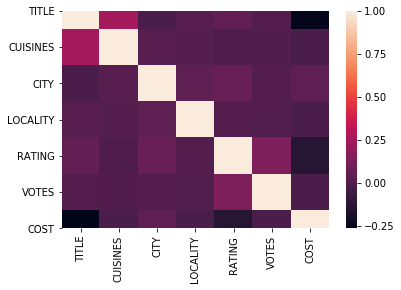

In [62]:
sns.heatmap(dfcor)

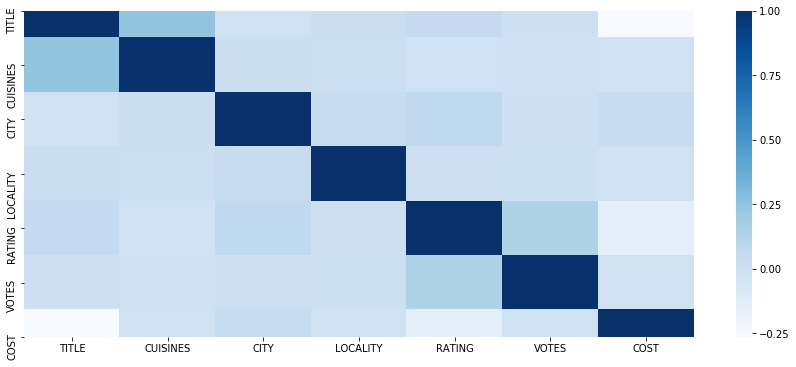

In [63]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

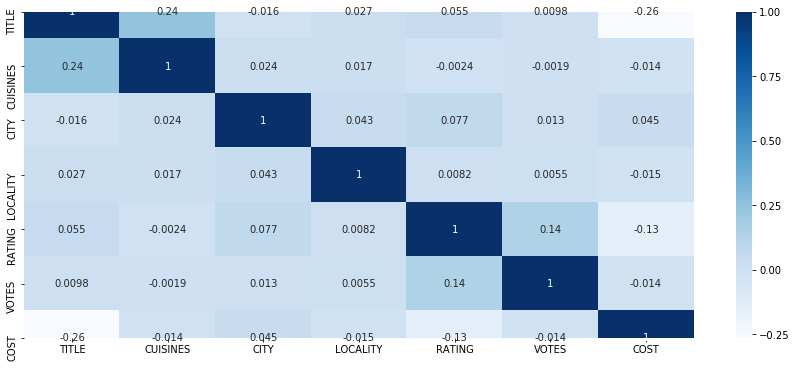

In [64]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

#### Removing the Outliers

In [65]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(12690, 7)
(11266, 7)


#### Checking Skewness and Removing it

In [66]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

TITLE      -0.069803
CUISINES   -0.218782
CITY        0.266332
LOCALITY    0.352317
RATING      2.768365
VOTES      -0.316806
COST        3.978801
dtype: float64

In [67]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [68]:
#Lets Again Check the Skewness
data.skew()

TITLE      -0.069803
CUISINES   -0.218782
CITY        0.266332
LOCALITY    0.352317
RATING      2.768365
VOTES      -0.316806
COST        0.397149
dtype: float64

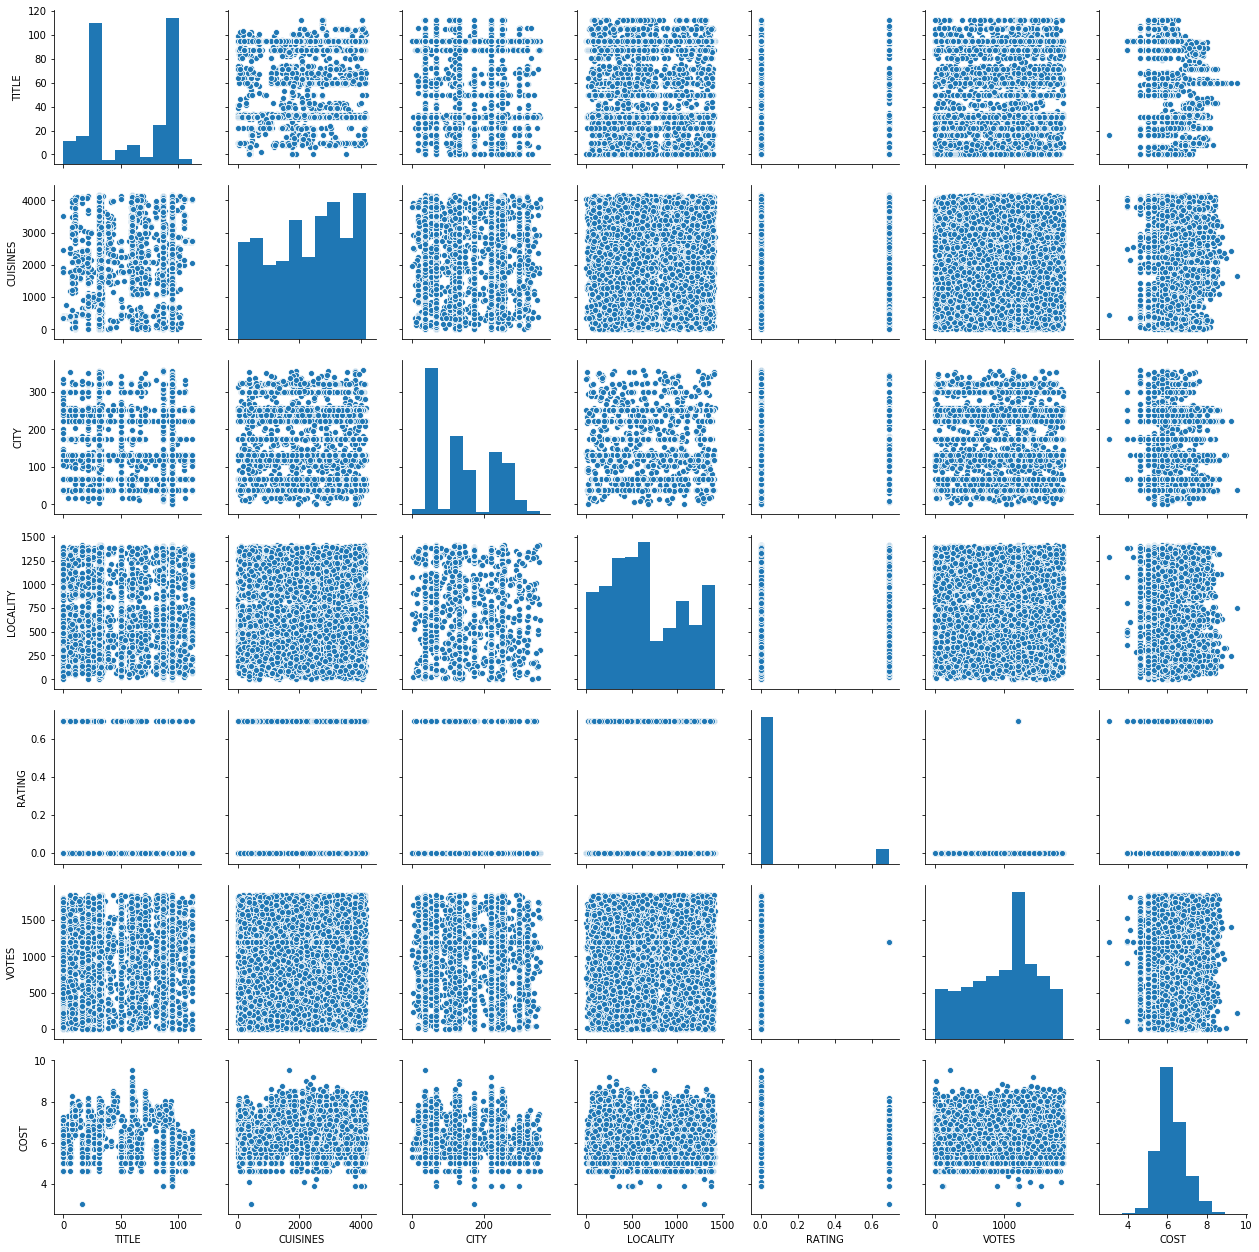

In [69]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

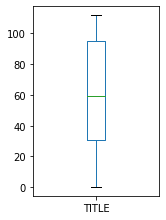

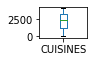

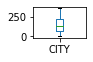

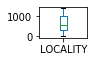

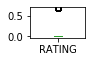

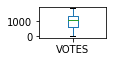

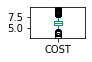

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

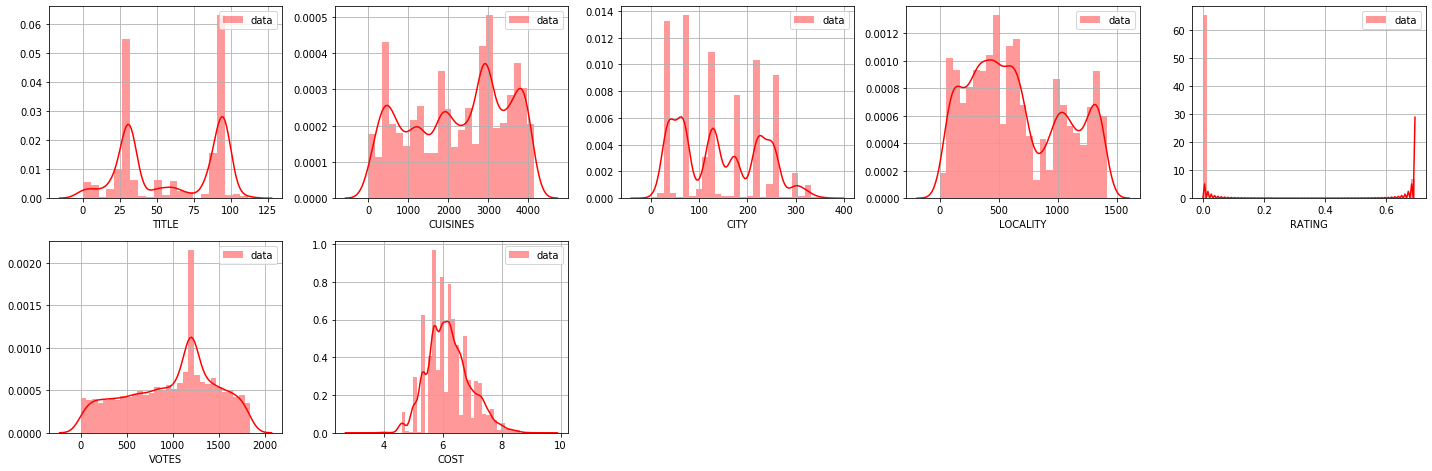

In [71]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### Line Plot

In [72]:
data.columns

Index(['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST'], dtype='object')

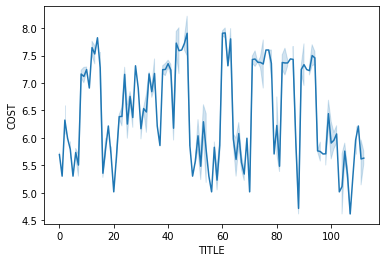

In [73]:
#Lets check the how TITLE is changing with respect to COST
sns.lineplot(data["TITLE"],data["COST"])
plt.show()

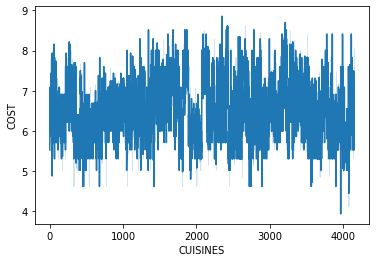

In [74]:
#Lets check the how CUISINES is changing with respect to COST
sns.lineplot(data["CUISINES"],data["COST"])
plt.show()

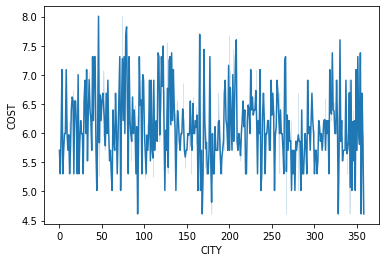

In [75]:
#Lets check the how CITY is changing with respect to COST
sns.lineplot(data["CITY"],data["COST"])
plt.show()

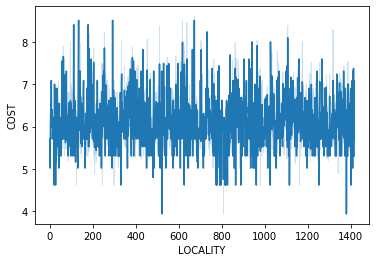

In [76]:
#Lets check the how LOCALITY is changing with respect to COST
sns.lineplot(data["LOCALITY"],data["COST"])
plt.show()

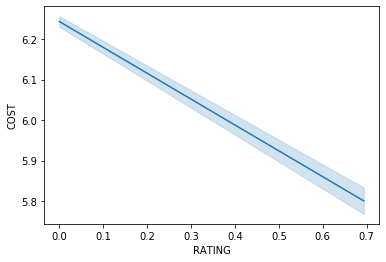

In [77]:
#Lets check the how RATING is changing with respect to COST
sns.lineplot(data["RATING"],data["COST"])
plt.show()

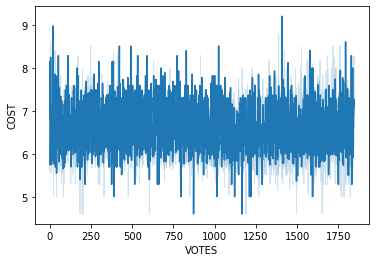

In [78]:
#Lets check the how VOTES is changing with respect to COST
sns.lineplot(data["VOTES"],data["COST"])
plt.show()

### Plotting Data using Scatter Plot

In [79]:
data.columns

Index(['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST'], dtype='object')

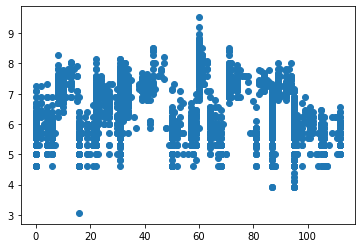

In [80]:
plt.scatter(data['TITLE'],data['COST'])

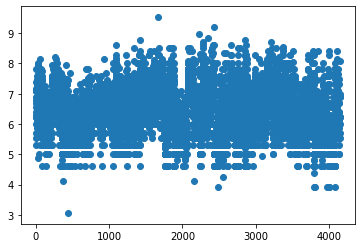

In [81]:
plt.scatter(data['CUISINES'],data['COST'])

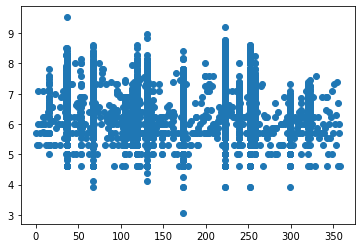

In [82]:
plt.scatter(data['CITY'],data['COST'])

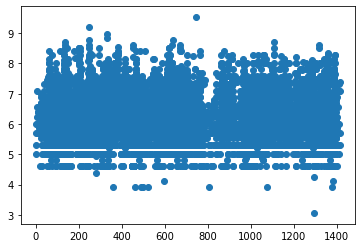

In [83]:
plt.scatter(data['LOCALITY'],data['COST'])

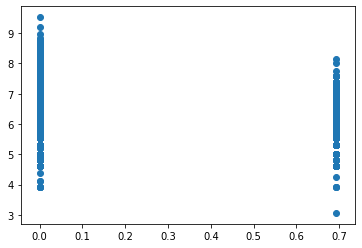

In [84]:
plt.scatter(data['RATING'],data['COST'])

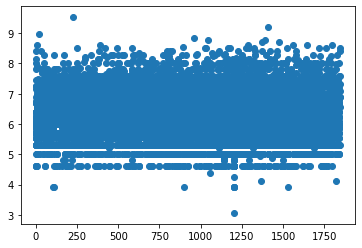

In [85]:
plt.scatter(data['VOTES'],data['COST'])

### Column Plot

In [86]:
collist = data.columns.values
ncols=12
nrows=10

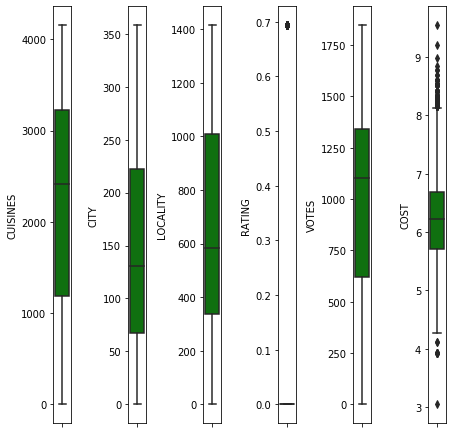

In [87]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [88]:
data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,320,285,0.0,1278,7.090910
1,33,289,67,1046,0.0,950,7.313887
2,31,2976,67,1101,0.0,712,6.685861
3,95,4130,222,136,0.0,787,6.685861
4,50,1766,222,620,0.0,470,5.707110
...,...,...,...,...,...,...,...
12685,95,2934,131,342,0.0,1349,6.216606
12686,33,2143,222,133,0.0,191,7.496097
12687,71,2088,239,1342,0.0,1428,7.170888
12688,31,3506,67,631,0.0,996,5.993961


In [89]:
X = data.drop("COST", axis=1)

In [90]:
X

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,31,2627,320,285,0.0,1278
1,33,289,67,1046,0.0,950
2,31,2976,67,1101,0.0,712
3,95,4130,222,136,0.0,787
4,50,1766,222,620,0.0,470
...,...,...,...,...,...,...
12685,95,2934,131,342,0.0,1349
12686,33,2143,222,133,0.0,191
12687,71,2088,239,1342,0.0,1428
12688,31,3506,67,631,0.0,996


In [91]:
Y = data["COST"]
Y

0        7.090910
1        7.313887
2        6.685861
3        6.685861
4        5.707110
           ...   
12685    6.216606
12686    7.496097
12687    7.170888
12688    5.993961
12689    6.398595
Name: COST, Length: 12690, dtype: float64

In [92]:
Y.shape

(12690,)

In [93]:
Y = Y.values.reshape(-1,1)

In [94]:
Y.shape

(12690, 1)

#### Applying Linear Regression

In [95]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [96]:
train_X.shape

(8502, 6)

In [97]:
train_Y.shape

(8502, 1)

In [98]:
test_X.shape

(4188, 6)

In [99]:
test_Y.shape

(4188, 1)

In [100]:
lg = LinearRegression()

In [101]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
lg.coef_

array([[-8.47182832e-03,  2.78208746e-05,  4.63638225e-04,
        -5.26914700e-06, -5.96690456e-01,  7.53743951e-06]])

In [103]:
lg.intercept_

array([6.61621528])

In [104]:
lg.score(train_X,train_Y)

0.17487761044199923

In [105]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[6.32526306]
 [6.03918839]
 [6.46761247]
 ...
 [5.5139178 ]
 [5.60132956]
 [6.44995333]]
actual price [[5.01727984]
 [7.31388683]
 [6.11146734]
 ...
 [5.70711026]
 [5.99396143]
 [6.39859493]]


In [106]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.480988591088892
Mean sqaured error: 0.4045583455807798
Root mean squared error: 0.6360490119328697


#### Boost through GradientBoostRegressor By using Parameters

In [107]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.6853564467778943
Mean squared error: 0.17
R2 Score: 0.66


#### Lets Visualize the Goodness of the Prediction

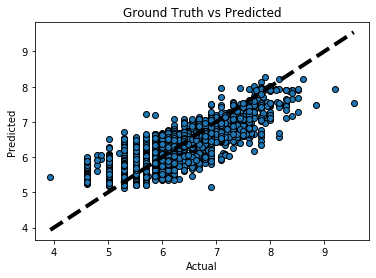

In [109]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Linear Regression using Recursion

In [110]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [111]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [112]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.18387693632165525
r2 score corresponding to  43 is 0.19210365878681634
r2 score corresponding to  44 is 0.16834024404631232
r2 score corresponding to  45 is 0.17359474529305796
r2 score corresponding to  46 is 0.17682771527697916
r2 score corresponding to  47 is 0.17945380855284554
r2 score corresponding to  48 is 0.19069440417210437
r2 score corresponding to  49 is 0.17535615973463003
r2 score corresponding to  50 is 0.18611278117858476
r2 score corresponding to  51 is 0.17104959733727787
r2 score corresponding to  52 is 0.17463089579950786
r2 score corresponding to  53 is 0.17994670230256848
r2 score corresponding to  54 is 0.18144000068285238
r2 score corresponding to  55 is 0.17382378636048923
r2 score corresponding to  56 is 0.19192060776154007
r2 score corresponding to  57 is 0.16511766642669456
r2 score corresponding to  58 is 0.18979462376493672
r2 score corresponding to  59 is 0.18215062841904817
r2 score corresponding to  60 is 0.16349955333

#### Boosting through AdaBoostRegressor

In [113]:
#Now Lets use ada boost regression algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lg,lreg]}
clf2 = GridSearchCV(ada_reg,parameters,cv=5)
clf2.fit(X,Y)
clf2.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [114]:
from sklearn.model_selection import cross_val_score
add_reg=AdaBoostRegressor(base_estimator=lg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.38284399394829444
Standard deviation in r2 score for ada boosting Regression:  0.011784846301390336


In [115]:
#Lets check maximum r2_score corresponding to this
from sklearn.metrics import r2_score
r_state=maxr2_score(ada_reg,X,Y)

r2 score corresponding to  42 is 0.4001577775213706
r2 score corresponding to  43 is 0.3932076089724339
r2 score corresponding to  44 is 0.35662458879993986
r2 score corresponding to  45 is 0.3927195431512177
r2 score corresponding to  46 is 0.37414424321724127
r2 score corresponding to  47 is 0.39696608044242
r2 score corresponding to  48 is 0.40384612147070875
r2 score corresponding to  49 is 0.3798009276801789
r2 score corresponding to  50 is 0.3860850020170923
r2 score corresponding to  51 is 0.37853402436837214
r2 score corresponding to  52 is 0.36918628417800525
r2 score corresponding to  53 is 0.3765073746719678
r2 score corresponding to  54 is 0.38313847285572133
r2 score corresponding to  55 is 0.37843133021589714
r2 score corresponding to  56 is 0.3552966623848388
r2 score corresponding to  57 is 0.3487966145030593
r2 score corresponding to  58 is 0.39044556391037755
r2 score corresponding to  59 is 0.40114064053960086
r2 score corresponding to  60 is 0.39974599207237405
r2 s

In [116]:
#Lets check the mean r2 score of both linear regression model and linear regression recurssion
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.17924217285712096
Standard deviation in r2 scorefor Linear Regression: 0.009921558646962364

Mean r2 score for KNN Regression:  0.17924217285712096
Stadard deviation in r2 score for KNN Regression: 0.009921558646962364


### KNN Model

In [117]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.45
R2 Score of linear svc: 0.12


### Lets use grid_search to find optimal value of n_neighbors for KNN Model

In [118]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 15}

In [119]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=15)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.16275327729519762
r2 score corresponding to  43 is 0.1770669340864922
r2 score corresponding to  44 is 0.17307086973689112
r2 score corresponding to  45 is 0.16082395143735395
r2 score corresponding to  46 is 0.15845779009273775
r2 score corresponding to  47 is 0.17677401951890848
r2 score corresponding to  48 is 0.1658762113620239
r2 score corresponding to  49 is 0.1687320571808072
r2 score corresponding to  50 is 0.15498982919498427
r2 score corresponding to  51 is 0.158590572096322
r2 score corresponding to  52 is 0.17794670983168137
r2 score corresponding to  53 is 0.17419806201774812
r2 score corresponding to  54 is 0.16703967226568328
r2 score corresponding to  55 is 0.16419386796569213
r2 score corresponding to  56 is 0.15180686724748926
r2 score corresponding to  57 is 0.16213638142511166
r2 score corresponding to  58 is 0.17100846919799217
r2 score corresponding to  59 is 0.15521996227393886
r2 score corresponding to  60 is 0.1864954556018473

In [120]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.17924217285712096
Standard deviation in r2 scorefor Linear Regression: 0.009921558646962364

Mean r2 score for KNN Regression:  0.1647000005237421
Stadard deviation in r2 score for KNN Regression: 0.01580363972834608


### Boosting Linear Regression

In [121]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.3767388372435318
Standard deviation in r2 score for ada boosting Regression:  0.0235322541641641


### Boosting KNN model

In [122]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.3782644954000554
Standard deviation in r2 score for ada boosting Regression:  0.02203598227060888


#### Lets check lasso regression and best value of alpha

In [123]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [124]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.1791990993302158
Standard deviation in r2 score for Lasso Regression:  0.009886387764285196


### Boosting Lasso Regressor

In [125]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.3859537859304246
Standard deviation in r2 score for ada boosting Regression:  0.011612901237570576


### Support Vector Regression

In [126]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "rbf")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.50
R2 Score of linear svc: 0.01


### Boosting Support Vector Machine

In [127]:
from sklearn.ensemble import AdaBoostRegressor

In [128]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.3863877723931573
Standard deviation in r2 score for ada boosting Regression:  0.019536174014514854


### Decision Tree Regressor

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


#### Lets Visualize the Goodness of the Prediction

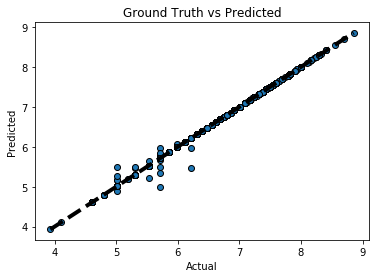

In [130]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_pred4, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [131]:
#predict the value
pred=dtregressor.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [5.86078622 6.2166061  6.62140565 ... 5.52545294 7.31388683 5.99396143]
actual price [[5.86078622]
 [6.2166061 ]
 [6.62140565]
 ...
 [5.52545294]
 [7.31388683]
 [5.99396143]]


### Boosting Decision Tree

In [132]:
from sklearn.ensemble import AdaBoostRegressor

In [133]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.38132504368364745
Standard deviation in r2 score for ada boosting Regression:  0.02033277763199014


### Random Forest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.19
R2 Score : 0.63


#### Random Forest Regressor with GridSearchCV

In [135]:
rf_gs = RandomForestRegressor(n_estimators=100)

In [136]:
n_features = X.shape[1]

In [137]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 4, 'max_depth': 17}


In [138]:
rf_gss = RandomForestRegressor(max_features = 2, max_depth = 7)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.5495913566361057
Standard deviation in r2 score for ada boosting Regression:  0.01822558420690839


#### Boosting RandomForestRegressor

In [139]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6830672140645145
Standard deviation in r2 score for ada boosting Regression:  0.010746385787665654


#### NOTE::All models,dtregressor gives the Highest r2 score(1) and mean squared error is  0 so we are going to save this model

In [140]:
import pickle
filename = 'Restaurant.sav'
pickle.dump(dtregressor, open(filename, 'wb'))

In [141]:
# Load model from disk and use it to make new predictions
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_X, test_Y)
print(result)

0.998506506871399


### Test Dataset of Restaurant Food

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
data1 = pd.read_excel('Data_Test_Restaurant.xlsx')
data1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


### Exploratory Data Analysis

In [144]:
data1.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [145]:
data1.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [146]:
data1.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

#### Lets check the null values without using visualization

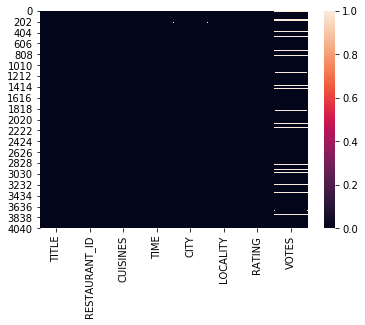

In [147]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data1.isnull())
plt.show()

#### Filling Null Values with Mode

In [148]:
for column in ['CITY','LOCALITY','RATING','VOTES']:
    data1[column].fillna(data1[column].mode()[0], inplace=True)

In [149]:
data1.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

#### Converting the  Testing Data into the same format like Training Dataset

In [150]:
data1.drop('RESTAURANT_ID',axis=1,inplace=True)

In [151]:
data1.drop('TIME',axis=1,inplace=True)

In [152]:
data1

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350 votes
3,None,Biryani,Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,"Continental, North Indian",Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,"Rolls, Beverages",Kochi,Kochi,-,6 votes


#### Lets Convert TITLE Column into Numeric 

In [153]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [157]:
data2 = pd.get_dummies(data1['TITLE'])

In [158]:
data1['TITLE']=data2

In [159]:
data1

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,0,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564 votes
1,0,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61 votes
2,0,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350 votes
3,0,Biryani,Faridabad,NIT,3.8,1445 votes
4,0,"South Indian, Kerala",Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...
4226,0,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287 votes
4227,0,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469 votes
4228,0,"Continental, North Indian",Faridabad,Sector 86,3.7,53 votes
4229,0,"Rolls, Beverages",Kochi,Kochi,-,6 votes


In [160]:
data3 = pd.get_dummies(data1['CUISINES'])

In [161]:
data1['CUISINES']=data3

In [162]:
data1

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,0,0,Noida,Sector 18,4.3,564 votes
1,0,0,Mumbai,Grant Road,4.2,61 votes
2,0,0,Mumbai,Marine Lines,3.8,350 votes
3,0,0,Faridabad,NIT,3.8,1445 votes
4,0,0,Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...
4226,0,0,New Delhi,Punjabi Bagh,3.9,287 votes
4227,0,0,Bangalore,HSR Layout,4.3,469 votes
4228,0,0,Faridabad,Sector 86,3.7,53 votes
4229,0,0,Kochi,Kochi,-,6 votes


In [163]:
data['TITLE'].unique()

array([ 31,  33,  95,  50,  22,  82,  98,  38,   6,  87,  10,   8,  89,
        16,  60,  30,  19, 112,  58,   0,   4,  13,  64,  71,  52,  74,
        67, 102, 106,  20,  92,  81,  84,  42,  68, 104,  43,  61,  57,
        66,  73,   3,  34,  59,  27, 101,  94,  72,  53,  24, 110,  41,
        83,  51, 105,  21,  39,  35,  99,   9,  26, 100,  40,  32,  23,
        79,  96,  12, 109,  80,  93,   2,  46,  63,  48,  97,   5,  90,
        54, 103,   1,  44,   7, 107,  37,  88,  17,  65,  45,  25,  56,
        85,  75, 111,  15,  49,  55,  78, 108,  62,  18,  70,  36,  76,
        91,  29,  11,  47,  86,  28,  69,  77,  14], dtype=int64)

In [165]:
data4 = pd.get_dummies(data1['CITY'])

In [166]:
data1['CITY']=data4

In [167]:
data1

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,0,0,0,Sector 18,4.3,564 votes
1,0,0,0,Grant Road,4.2,61 votes
2,0,0,0,Marine Lines,3.8,350 votes
3,0,0,0,NIT,3.8,1445 votes
4,0,0,0,Kaloor,3.6,23 votes
...,...,...,...,...,...,...
4226,0,0,0,Punjabi Bagh,3.9,287 votes
4227,0,0,0,HSR Layout,4.3,469 votes
4228,0,0,0,Sector 86,3.7,53 votes
4229,0,0,0,Kochi,-,6 votes


In [169]:
data5 = pd.get_dummies(data1['LOCALITY'])

In [170]:
data1['LOCALITY']=data5

In [171]:
data1

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,0,0,0,0,4.3,564 votes
1,0,0,0,0,4.2,61 votes
2,0,0,0,0,3.8,350 votes
3,0,0,0,0,3.8,1445 votes
4,0,0,0,0,3.6,23 votes
...,...,...,...,...,...,...
4226,0,0,0,0,3.9,287 votes
4227,0,0,0,0,4.3,469 votes
4228,0,0,0,0,3.7,53 votes
4229,0,0,0,0,-,6 votes


In [172]:
data6 = pd.get_dummies(data1['VOTES'])

In [173]:
data1['VOTES']=data6

In [174]:
data1

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,0,0,0,0,4.3,0
1,0,0,0,0,4.2,0
2,0,0,0,0,3.8,0
3,0,0,0,0,3.8,0
4,0,0,0,0,3.6,0
...,...,...,...,...,...,...
4226,0,0,0,0,3.9,0
4227,0,0,0,0,4.3,0
4228,0,0,0,0,3.7,0
4229,0,0,0,0,-,0


In [176]:
data1.dtypes

TITLE        uint8
CUISINES     uint8
CITY         uint8
LOCALITY     uint8
RATING      object
VOTES        uint8
dtype: object

In [179]:
data7 = pd.get_dummies(data1['RATING'])

In [180]:
data1['RATING']=data7

In [182]:
data1

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
4226,0,0,0,0,0,0
4227,0,0,0,0,0,0
4228,0,0,0,0,0,0
4229,0,0,0,0,1,0


In [183]:
data1.dtypes

TITLE       uint8
CUISINES    uint8
CITY        uint8
LOCALITY    uint8
RATING      uint8
VOTES       uint8
dtype: object

### Load Test Dataset into dtregressor Model 

In [184]:
train_X = data1
pred = dtregressor.predict(train_X)
print(pred)

[5.99396143 5.99396143 5.99396143 ... 5.99396143 5.70711026 5.99396143]


#### Compare the Predicted Result with Actual Price of Testing DataSet Using dtregressor Model 

In [185]:
#predict the value
pred1=dtregressor.predict(test_X)
print("Predicted result price:",pred1)
print("actual price",test_Y)

Predicted result price: [5.86078622 6.2166061  6.62140565 ... 5.52545294 7.31388683 5.99396143]
actual price [[5.86078622]
 [6.2166061 ]
 [6.62140565]
 ...
 [5.52545294]
 [7.31388683]
 [5.99396143]]
